# Notebook for visualization of iterative optimization of routes

In [35]:
import matplotlib.pyplot as plt
import json
import os
import numpy as np
from collections import defaultdict
from IPython.display import clear_output
import time

In [36]:
%load_ext autoreload
%autoreload 2

import sys
sys.path.append(os.path.join(os.getcwd(), '..'))
import python_lib.viz as my_viz
import python_lib.utils as my_utils

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [23]:
path_to_request = '../test_data/inputs/simple_test_1/request.json'

path_to_result_directory = '../test_data/results/annealing/simple_test_1'
path_to_checkpoints = os.path.join(path_to_result_directory, 'checkpoints_1.json')
path_to_penalty_history = os.path.join(path_to_result_directory, 'penalty_history_1.json')

In [24]:
request = my_utils.read_json(path_to_request)

checkpoints = my_utils.read_json(path_to_checkpoints)
penalty_history = my_utils.read_json(path_to_penalty_history)

In [25]:
checkpoints[0]

{'iteration_number': 0,
 'penalty_values': {'distance-penalty': 832220.125},
 'routes': [{'location_ids': ['location 9',
    'location 6',
    'location 5',
    'location 8',
    'location 7',
    'location 4',
    'location 2',
    'location 3',
    'location 1'],
   'vehicle_id': 'courier 2'},
  {'location_ids': [], 'vehicle_id': 'courier 1'}],
 'total_penalty': 832220.125}

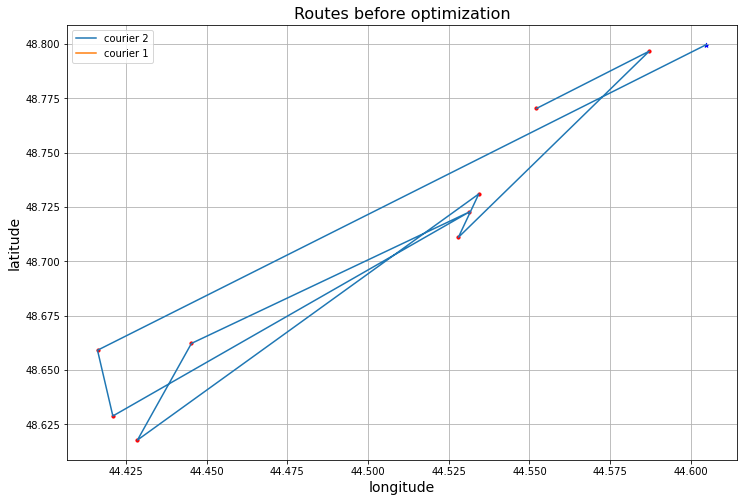

In [28]:
my_viz.plot_routes(request, checkpoints[0]['routes'], title='Routes before optimization')

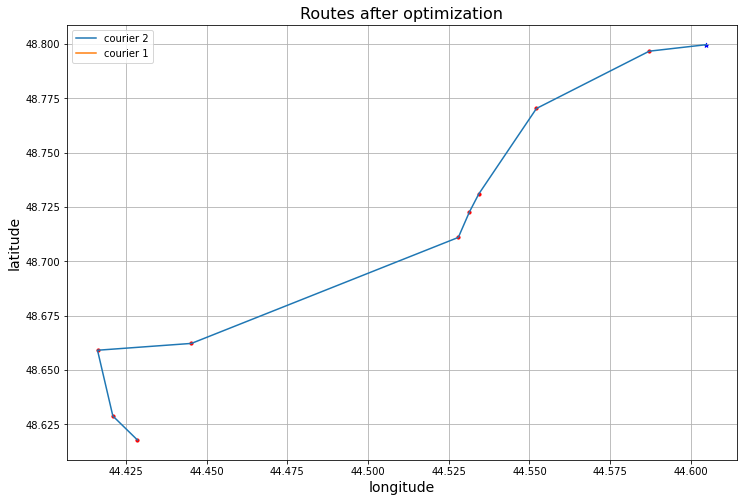

In [29]:
my_viz.plot_routes(request, checkpoints[-1]['routes'], title='Routes after optimization')

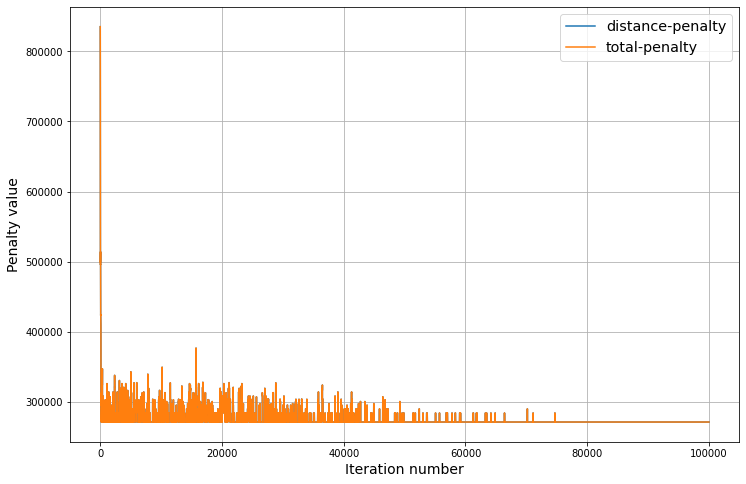

In [30]:
my_viz.plot_penalty_history(penalty_history, skip_first_n=0)

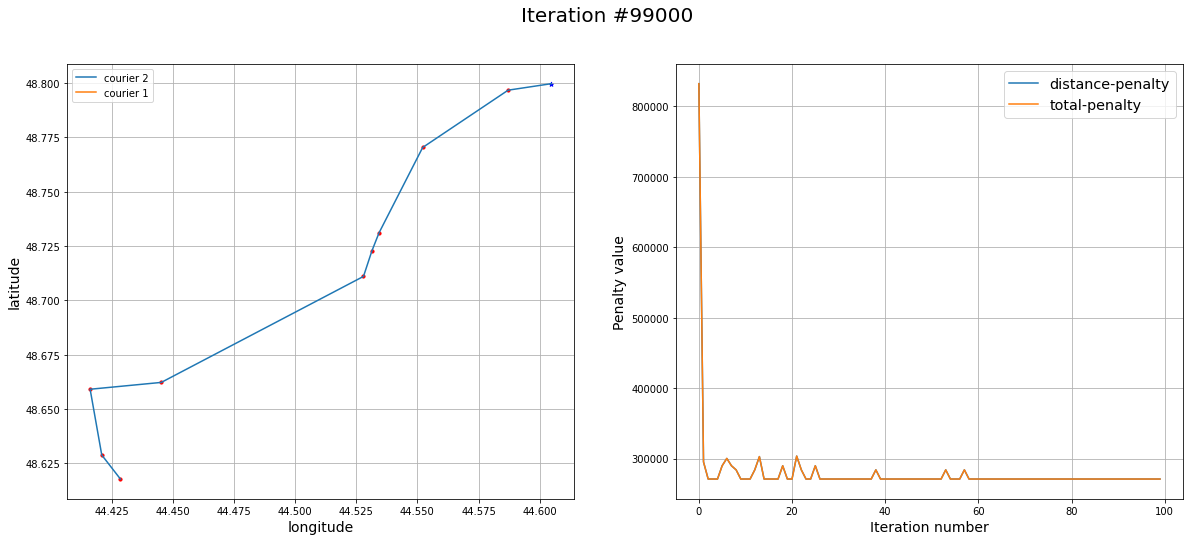

In [37]:
my_viz.plot_checkpoints(request, checkpoints)